In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
from datetime import datetime, date, time

In [45]:
data= pd.read_csv(f'C:/Users/я/Desktop/ML/data/DataSet2.csv')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

Dataset имеет большое количество пропусков, в дальнейшем надо постараться заполнить хотя бы часть.

In [47]:
data.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


<font size=4><b>Получили следующую характеристику исходных данных:</b>
- пропуски содержатся в 19 из 30 столбцах, больше всего в столбце "Critic Consensus" - 339 пропущенных значений;
- тип данных столбца "IMDB Votes" нужно перевести из object в float64;
- тип данных столбцов "Year of Release", "Original Release Date" и "Streaming Release Date" нужно перевести в тип data. 

## Заполнение пропущенных значений

In [48]:
data.duplicated().sum()

0

In [49]:
f = lambda x: int(str(x).replace(',',''))

data['IMDB Votes'] = data['IMDB Votes'].transform(f)

При просмотре датасета была замечена такая аномалия: в некоторых строках отсутствует вся информация со столбца "Movie Info" по столбец "Tomatometer Rotten Critics Count", т. е. 19 из 30 столбцов - это больше половины. Проблема в том, что восстановить пропущенные значения объективно не получится, например имена актеров, директоров или состав критиков нельзя брать из строк других фильмов - это индивидуальная информация каждого фильма.
Поэтому для дальнейшего анализа данных и получения честных результатов следует удалить данные строки

In [50]:
wrong_columns = data.columns[10:-1]
for column in wrong_columns:
    data[column]=data[column].fillna('unknown')
    
indexes = []

for ind in data.index:
    k = 0 
    for el in range(len(wrong_columns)-1):
        if data.iloc[ind][wrong_columns[el]] != data.iloc[ind][wrong_columns[el+1]]:
            k = 1
            break       
    if k == 0:
        indexes.append(ind)

data = data.drop(index = indexes)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        439 non-null    int64  
 1   Film                              439 non-null    object 
 2   Oscar Year                        439 non-null    object 
 3   Film Studio/Producer(s)           439 non-null    object 
 4   Award                             439 non-null    object 
 5   Year of Release                   439 non-null    int64  
 6   Movie Time                        439 non-null    int64  
 7   Movie Genre                       439 non-null    object 
 8   IMDB Rating                       439 non-null    float64
 9   IMDB Votes                        439 non-null    int64  
 10  Movie Info                        439 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic Consen

In [51]:
for column in data.columns:
    try:
        print(column, data[column].value_counts()['unknown'])
    except:
        pass

Movie Info 1
Critic Consensus 100
Directors 2
Authors 2
Streaming Release Date 1
Audience Status 3


In [52]:
data.replace({'Streaming Release Date': {'unknown': (data['Streaming Release Date'].mode())[0]}}, inplace=True)

Оставшиеся значения unknown восстановить не получится, потому придется оставить так, так как их немного.

In [53]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        439 non-null    int64  
 1   Film                              439 non-null    object 
 2   Oscar Year                        439 non-null    object 
 3   Film Studio/Producer(s)           439 non-null    object 
 4   Award                             439 non-null    object 
 5   Year of Release                   439 non-null    int64  
 6   Movie Time                        439 non-null    int64  
 7   Movie Genre                       439 non-null    object 
 8   IMDB Rating                       439 non-null    float64
 9   IMDB Votes                        439 non-null    int64  
 10  Movie Info                        439 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic Consen

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,1019,...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562
13,13,Cimarron,1930/31,RKO Radio,Winner,1931,123,"Drama,Western",5.9,5851,...,Rotten,50.0,24.0,Spilled,25.0,1514.0,6.0,12.0,12.0,db2683c0-128e-4b5c-858f-d9f18c2fb9b9
18,18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,18314,...,Certified-Fresh,86.0,42.0,Upright,77.0,7014.0,10.0,36.0,6.0,be69f946-6adc-47e4-8491-79d6c033f59d
21,21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,3003,...,Fresh,90.0,10.0,Upright,74.0,617.0,2.0,9.0,1.0,c8994348-093e-4e22-8ffe-6ad3332a2bab
26,26,Cavalcade,1932/33,Fox,Winner,1933,112,"Drama,Romance,War",5.9,4961,...,Rotten,59.0,29.0,Spilled,26.0,1027.0,10.0,17.0,12.0,e71a2212-92c3-4212-9eb2-d468f10c768e
27,27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,11342,...,Fresh,96.0,25.0,Upright,74.0,7561.0,4.0,24.0,1.0,1ad59370-1ed5-4d3a-a8c4-8571f95da168
28,28,A Farewell to Arms,1932/33,Paramount,Nominee,1932,80,"Drama,Romance,War",6.5,5567,...,Fresh,93.0,14.0,Spilled,53.0,5697.0,2.0,14.0,1.0,39ab1f95-f400-4cdc-be82-425015486234


In [54]:
## Изменим тип данных
data['IMDB Votes'] = data['IMDB Votes'].astype(int)

data ['Original Release Date'] = pd.to_datetime(data['Original Release Date'], format = '%Y-%m-%d')
data ['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'], format = '%Y-%m-%d')

data['Tomatometer Rating'] = data['Tomatometer Rating'].astype(int)
data['Tomatometer Count'] = data['Tomatometer Count'].astype(int)
data['Audience Rating'] = data['Audience Rating'].astype(int)
data['Audience Count'] = data['Audience Rating'].astype(int)
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].astype(int)
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].astype(int)
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].astype(int)

data.isna().sum()

Unnamed: 0                          0
Film                                0
Oscar Year                          0
Film Studio/Producer(s)             0
Award                               0
Year of Release                     0
Movie Time                          0
Movie Genre                         0
IMDB Rating                         0
IMDB Votes                          0
Movie Info                          0
Genres                              0
Critic Consensus                    0
Content Rating                      0
Directors                           0
Authors                             0
Actors                              0
Original Release Date               0
Streaming Release Date              0
Production Company                  0
Tomatometer Status                  0
Tomatometer Rating                  0
Tomatometer Count                   0
Audience Status                     0
Audience Rating                     0
Audience Count                      0
Tomatometer 

Почистим данные

In [55]:
sorted(data['Movie Genre'].unique())

['Action,Adventure',
 'Action,Adventure,Drama',
 'Action,Adventure,Fantasy',
 'Action,Adventure,History',
 'Action,Adventure,Romance',
 'Action,Adventure,Sci-Fi',
 'Action,Biography,Crime',
 'Action,Crime,Drama',
 'Action,Drama,History',
 'Action,Drama,Thriller',
 'Action,Romance,Thriller',
 'Action,Sci-Fi,Thriller',
 'Adventure,Biography,Crime',
 'Adventure,Biography,Drama',
 'Adventure,Comedy,Crime',
 'Adventure,Comedy,Drama',
 'Adventure,Comedy,Family',
 'Adventure,Comedy,History',
 'Adventure,Comedy,Musical',
 'Adventure,Drama',
 'Adventure,Drama,Family',
 'Adventure,Drama,Fantasy',
 'Adventure,Drama,History',
 'Adventure,Drama,Romance',
 'Adventure,Drama,Sci-Fi',
 'Adventure,Drama,Thriller',
 'Adventure,Drama,War',
 'Adventure,Drama,Western',
 'Adventure,Family,Fantasy',
 'Adventure,Thriller',
 'Animation,Adventure,Comedy',
 'Animation,Family,Fantasy',
 'Biography,Comdey,Drama',
 'Biography,Comedy,Crime',
 'Biography,Comedy,Drama',
 'Biography,Crime,Drama',
 'Biography,Drama',
 'B

In [56]:
sorted(data['Film Studio/Producer(s)'].unique())

['20th Century-Fox',
 'A. Kitman Ho and Oliver Stone',
 'Aaron Rosenberg',
 'Adele Romanski, Dede Gardner, and Jeremy Kleiner',
 'Alan Marshall and David Puttnam',
 'Albert Berger and Ron Yerxa',
 'Albert S. Ruddy',
 'Alberto Grimaldi and Harvey Weinstein',
 'Alejandro González Iñárritu, Steve Golin, and Jon Kilik',
 'Alfonso Cuarón and David Heyman',
 'Alison Owen, Eric Fellner and Tim Bevan',
 'Alix Madigan and Anne Rosellini',
 'Anatole Litvak and Frank McCarthy',
 'Andy Harries, Christine Langan, and Tracey Seaward',
 'Anthony Havelock-Allan and John Brabourne',
 'Anthony Minghella, Sydney Pollack, Donna Gigliotti, and Redmond Morris',
 'Arlene Donovan',
 'Arnold Kopelson',
 'Arnon Milchan, Steve Golin, Alejandro G. Iñárritu, Mary Parent, and Keith Redmon',
 'Arthur Freed',
 'Arthur Hornblow Jr.',
 'Arthur P. Jacobs',
 'Barbra Streisand and Andrew S. Karsch',
 'Barrie M. Osborne, Fran Walsh, and Peter Jackson',
 'Barrie M. Osborne, Peter Jackson, and Fran Walsh',
 'Barry Spikings, 

In [57]:
sorted(data['Production Company'].unique())

['20th Century Fox',
 '20th Century Fox Film Corporation',
 '20th Century-Fox',
 '21 Laps Entertainment',
 'A24',
 'A24 Films',
 'Annapurna Pictures',
 'Batjac Productions',
 'Buena Vista',
 'Buena Vista Internationa',
 'Buena Vista Pictures',
 'Columbia',
 'Columbia Pictures',
 'Columbia Pictures Corporation',
 'Criterion Collection',
 'DreamWorks Studios',
 'Dreamworks',
 'Dreamworks Distribution',
 'Dreamworks Distribution LLC',
 'Dreamworks Pictures',
 'Eagle-Lion Films',
 'Element Pictures',
 'Embassy Pictures/Rialto Pictures',
 'Film 44',
 'Focus Features',
 'Fox',
 'Fox Searchlight',
 'Fox Searchlight Pictures',
 'Fox Searchlight Pictures, Film4 and Waypoint',
 'Gramercy',
 'Gramercy Pictures',
 'Gravitas',
 'HBO Video',
 'Hollywood/Buena Vista',
 'IFC Films',
 'Image Entertainment Inc.',
 'Liberty Films',
 'Liongate Films',
 'Lions Gate Films',
 'Lionsgate',
 'Live Home Video',
 'MCA Universal Home Video',
 'MGM',
 'MGM Home Entertainment',
 'MGM/United Artists',
 'Madacy Enter

In [58]:
sorted(data['Tomatometer Status'].unique())

['Certified-Fresh', 'Fresh', 'Rotten']

In [59]:
sorted(data['Audience Status'].unique())

['Spilled', 'Upright', 'unknown']

In [60]:
sorted(data['Content Rating'].unique())

['G', 'NR', 'PG', 'PG-13', 'R']

In [61]:
def replace(wrong_list, correct, column = 'Production Company'):
    for i in wrong_list:
        data.replace({column: {i: correct}}, inplace=True)
replace(['20th Century Fox', '20th Century-Fox'], '20th Century Fox Film Corporation')
replace(['A24'], 'A24 Films',)
replace(['Buena Vista', 'Buena Vista Internationa'], 'Annapurna Pictures')
replace(['Columbia', 'Columbia Pictures Corporation'], 'Columbia Pictures')
replace(['DreamWorks Studios', 'Dreamworks', 'Dreamworks Distribution', 'Dreamworks Distribution LLC'], 'Dreamworks Pictures')
replace(['Film 44', 'Focus Features', 'Fox', 'Fox Searchlight', 'Fox Searchlight Pictures, Film4 and Waypoint'], 'Fox Searchlight Pictures')
replace(['Gramercy'], 'Gramercy Pictures')
replace(['Miramax'], 'Miramax Films')
replace(['Orion Pictures'], 'Orion Pictures Corporation')
replace(['Roadside Attractions\xa0'], 'Roadside Attractions')
replace(['Sony Classics','Sony Pictures'], 'Sony Pictures Classics')
replace(['Sony Pictures Entertainment'], 'Sony Pictures Home Entertainment')
replace(['The Weinstein Co.', 'The Weinstein Co./MGM'], 'The Weinstein Company')
replace(['Universal', 'Universal Studios'], 'Universal Pictures')

sorted(data['Production Company'].unique())

['20th Century Fox Film Corporation',
 '21 Laps Entertainment',
 'A24 Films',
 'Annapurna Pictures',
 'Batjac Productions',
 'Buena Vista Pictures',
 'Columbia Pictures',
 'Criterion Collection',
 'Dreamworks Pictures',
 'Eagle-Lion Films',
 'Element Pictures',
 'Embassy Pictures/Rialto Pictures',
 'Fox Searchlight Pictures',
 'Gramercy Pictures',
 'Gravitas',
 'HBO Video',
 'Hollywood/Buena Vista',
 'IFC Films',
 'Image Entertainment Inc.',
 'Liberty Films',
 'Liongate Films',
 'Lions Gate Films',
 'Lionsgate',
 'Live Home Video',
 'MCA Universal Home Video',
 'MGM',
 'MGM Home Entertainment',
 'MGM/United Artists',
 'Madacy Entertainment',
 'Marvel Studios',
 'Media Home Entertainment',
 'Miramax Films',
 'NCM Fathom',
 'Nelson Entertainment',
 'Netflix',
 'New Line Cinema',
 'New Line Home Entertainment',
 'Open Road Films',
 'Orion Pictures Corporation',
 'Paramount',
 'Paramount Classics',
 'Paramount Home Video',
 'Paramount Pictures',
 'Paramount Studios',
 'Paramount Vantage',


In [62]:
data.duplicated().sum()

0

## EDA

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        439 non-null    int64         
 1   Film                              439 non-null    object        
 2   Oscar Year                        439 non-null    object        
 3   Film Studio/Producer(s)           439 non-null    object        
 4   Award                             439 non-null    object        
 5   Year of Release                   439 non-null    int64         
 6   Movie Time                        439 non-null    int64         
 7   Movie Genre                       439 non-null    object        
 8   IMDB Rating                       439 non-null    float64       
 9   IMDB Votes                        439 non-null    int32         
 10  Movie Info                        439 non-null    objec

In [64]:
data.describe()[['Movie Time', 'IMDB Rating', 'Tomatometer Rating', 'Audience Rating', 'IMDB Votes', 'Tomatometer Count', 'Audience Count']]

,Movie Time,IMDB Rating,Tomatometer Rating,Audience Rating,IMDB Votes,Tomatometer Count,Audience Count
count,439.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000
mean,126.742597,7.634624,87.503417,82.428246,2.355875e+05,110.697039,82.428246
min,66.000000,5.600000,29.000000,21.000000,1.019000e+03,5.000000,21.000000
25%,109.000000,7.300000,84.000000,78.000000,1.438900e+04,25.000000,78.000000
50%,123.000000,7.700000,91.000000,85.000000,8.205100e+04,54.000000,85.000000
75%,138.000000,8.000000,95.000000,90.000000,2.965760e+05,199.000000,90.000000
max,228.000000,9.300000,100.000000,98.000000,2.452594e+06,574.000000,98.000000
std,25.831555,0.508857,11.690622,10.927897,3.657208e+05,119.541406,10.927897


Создадим новые столбцы для дальнейшей работы работы

In [65]:
data['Total votes'] = data['IMDB Votes'] + data['Audience Count'] + data['Tomatometer Count']
data['Avg rating'] = round((data['IMDB Rating']*10 + data['Tomatometer Rating'] + data['Audience Rating'])/3)

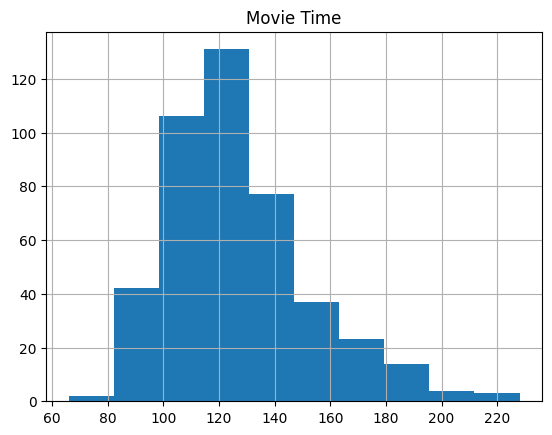

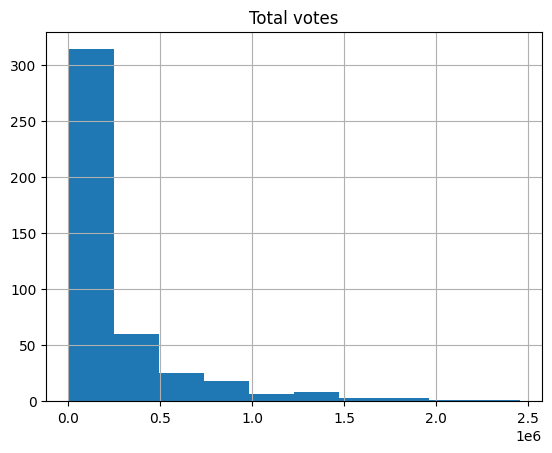

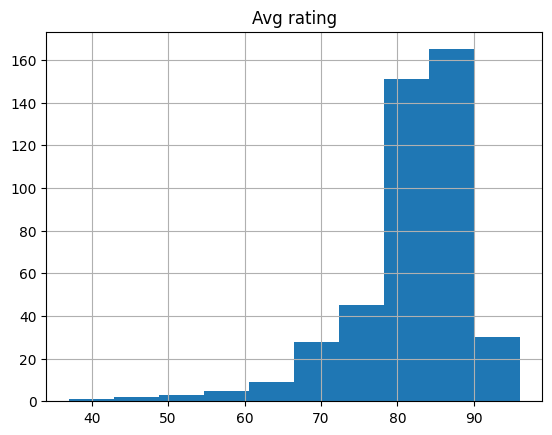

In [66]:
selected_columns = ['Movie Time', 'Total votes', 'Avg rating']

for column in selected_columns:
    data.hist(column)

## Выводы:
- Выбросы затрудняют чтение данных о количестве проголосовавших, средней оценки;
- Гистограммы 'Total votes' и 'Movie Time' смещены вправо;
- Гистограмма 'Avg rating' смещена влево.

## Изучение и обработка выбросов
читывая приведенные выше результаты, столбцы, содержащие выбросы, — это 'Movie Time', 'IMDB Votes', 'Audience Count', 'Tomatometer Count', а также 'IMDB Rating', 'Tomatometer Rating' и 'Audience Rating'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [67]:
outlier = data[['Movie Time', 'Total votes', 'Avg rating']]
outlier

,Movie Time,Total votes,Avg rating
0,144,12345,82.0
3,100,6935,37.0
6,95,1066,50.0
9,87,2156,72.0
13,123,5900,45.0
...,...,...,...
552,136,354753,82.0
553,132,132433,66.0
557,209,349828,87.0
559,122,1056713,80.0


In [68]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

Movie Time       109.0
Total votes    14497.5
Avg rating        80.0
Name: 0.25, dtype: float64

In [69]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

Movie Time        138.0
Total votes    296911.5
Avg rating         87.0
Name: 0.75, dtype: float64

In [70]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Movie Time,Total votes,Avg rating
0,144,12345,82.0
9,87,2156,72.0
18,112,18433,79.0
21,86,3087,79.0
27,89,11441,81.0
...,...,...,...
549,134,483085,75.0
550,119,184218,79.0
551,135,148164,82.0
552,136,354753,82.0


In [71]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [72]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID,Total votes,Avg rating
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,...,46,Upright,78,78,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067,12345,82.0
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,...,8,Upright,69,69,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562,2156,72.0
18,18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,18314,...,42,Upright,77,77,10,36,6,be69f946-6adc-47e4-8491-79d6c033f59d,18433,79.0
21,21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,3003,...,10,Upright,74,74,2,9,1,c8994348-093e-4e22-8ffe-6ad3332a2bab,3087,79.0
27,27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,11342,...,25,Upright,74,74,4,24,1,1ad59370-1ed5-4d3a-a8c4-8571f95da168,11441,81.0


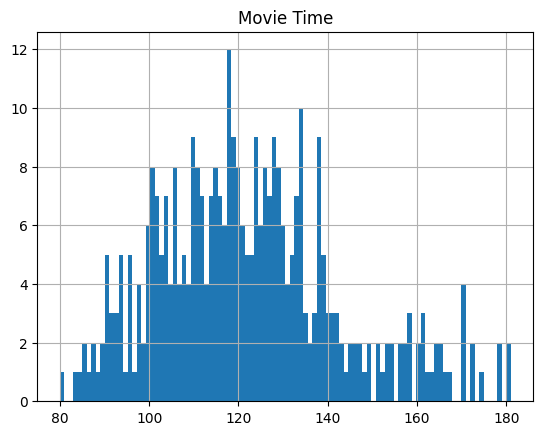

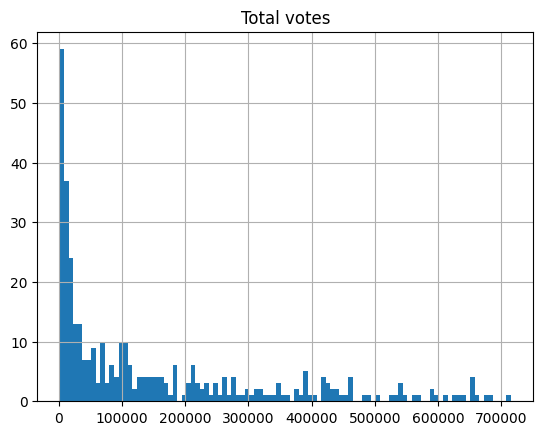

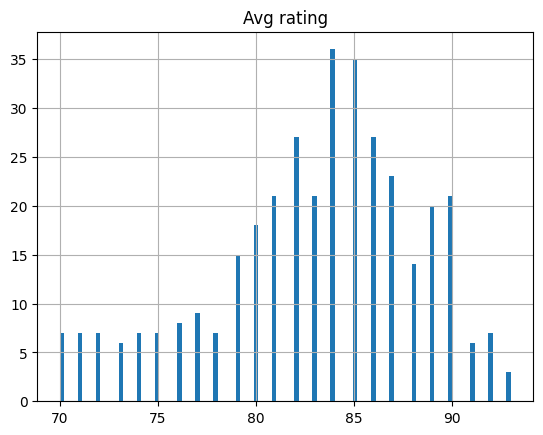

In [73]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[['Movie Time', 'Total votes', 'Avg rating']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

## Изучение основных параметров без выбросов

[[<Axes: title={'center': 'Movie Time'}>]]
[[<Axes: title={'center': 'Movie Time'}>]]


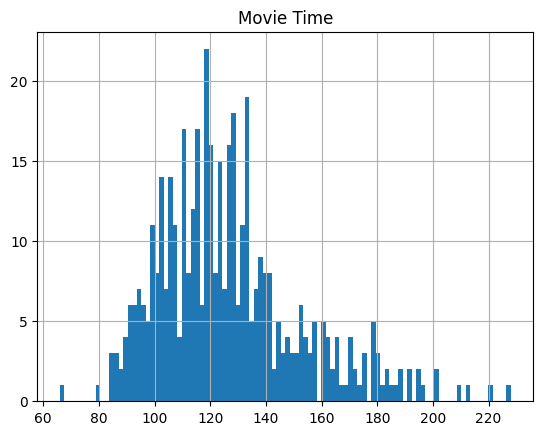

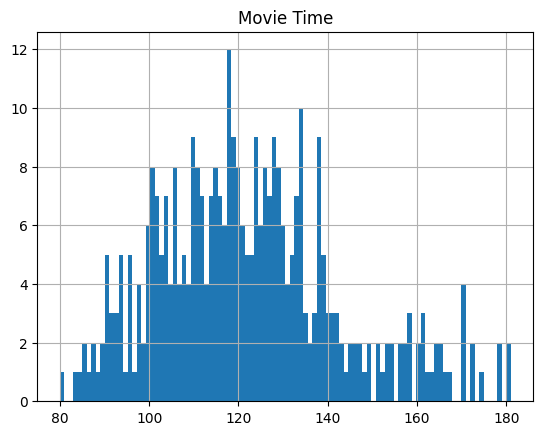

In [74]:
print (data.hist('Movie Time', bins=100))
print (data_filtered.hist('Movie Time', bins=100))

## Заключение:
- Выброс продолжительности фильмов был уменьшен с максимального 210 до 180.  Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо. График почти симметричного распределения.
- Судя по графику среднее значение продолжительности фильма находится в диапазоне от 100 до 140. При длительности боьше данного диапазона фильм может считаться долгим, а при меньшей - соответственно коротким.м.

[[<Axes: title={'center': 'Total votes'}>]]
[[<Axes: title={'center': 'Total votes'}>]]


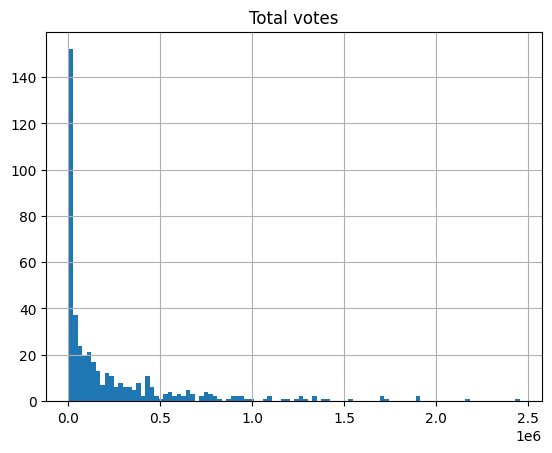

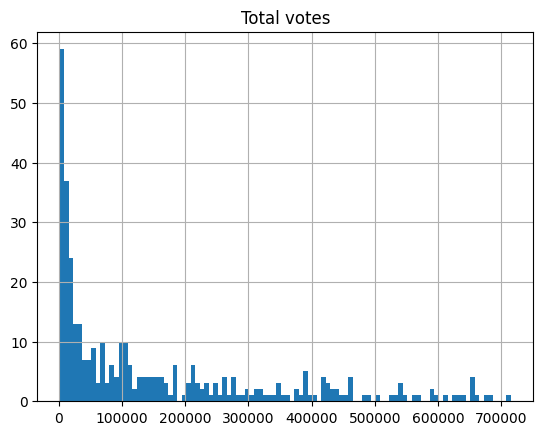

In [75]:
print (data.hist('Total votes', bins=100))
print (data_filtered.hist('Total votes', bins=100))

## Заключение:
- Выброс числа всех проголосовавших был уменьшен с максимального 2 500 000 до 710 000. Среднее значение все еще выше медианы, поэтому график наколнен вправо.
- На графике также видно, что большая часть оценок распределена в диапозоне от 0 до 110 000. Максимальное число голосов составляет более 700 000. Для диапазона более 110 0000 значение начинает резко уменьшаться.я.

[[<Axes: title={'center': 'Avg rating'}>]]
[[<Axes: title={'center': 'Avg rating'}>]]


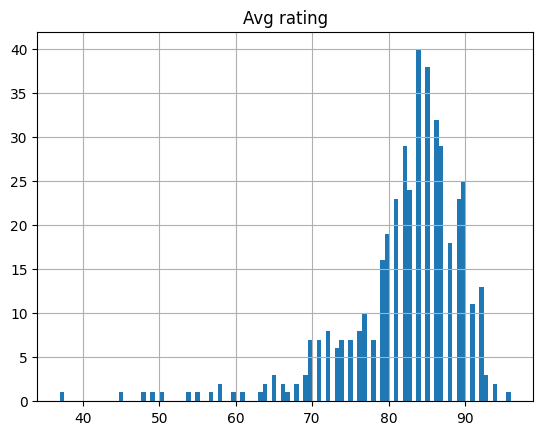

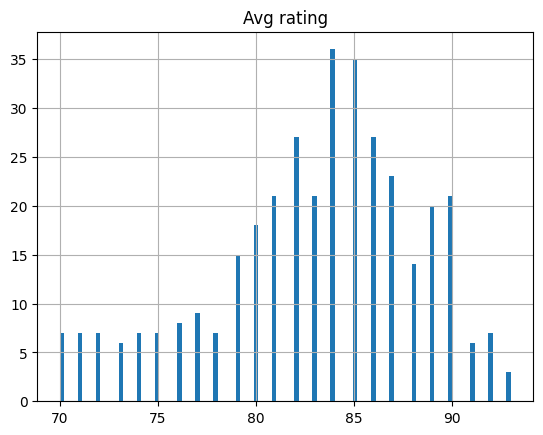

In [76]:
print (data.hist('Avg rating', bins=100))
print (data_filtered.hist('Avg rating', bins=100))

## Заключение:
- Нижний порог средней оценки фильма был увиличен с 35 до 70. Среднее значение близко к медиане, поэтому график почти симметричного распределения.
- Средняя оценка находится в диапозоне от 82 до 86. Значит будем считать оценку нориальной. Если средняя оценка фильма больше данного диапазона, то будем считать фильм отличным, а если меньше, то плохим или ниже хуже среднего .
 .

## Анализ по годам
Найдем среднюю оценку фильма по году, а также число выпущенных в данном году фильмов.

In [77]:
avg_rating = data_filtered.pivot_table(index='Year of Release', values='Avg rating', aggfunc='mean')
avg_rating.sort_values(ascending=False ,by='Avg rating')

,Avg rating
Year of Release,
1960,90.000000
1979,88.000000
1993,87.500000
1948,87.400000
1971,87.333333
...,...
2002,78.666667
1965,76.333333
1943,76.142857


In [78]:
films_in_year = data_filtered.pivot_table(index='Year of Release', values='Film ID', aggfunc='count')
films_in_year = films_in_year.sort_values(ascending=False, by ='Film ID' )
films_in_year = films_in_year.reset_index().reset_index()
films_in_year

,index,Year of Release,Film ID
0,0,1942,9
1,1,1939,9
2,2,2016,8
3,3,2011,8
4,4,1937,8
...,...,...,...
86,86,1927,1
87,87,1930,1
88,88,1960,1
89,89,1931,1


<Axes: xlabel='Year of Release'>

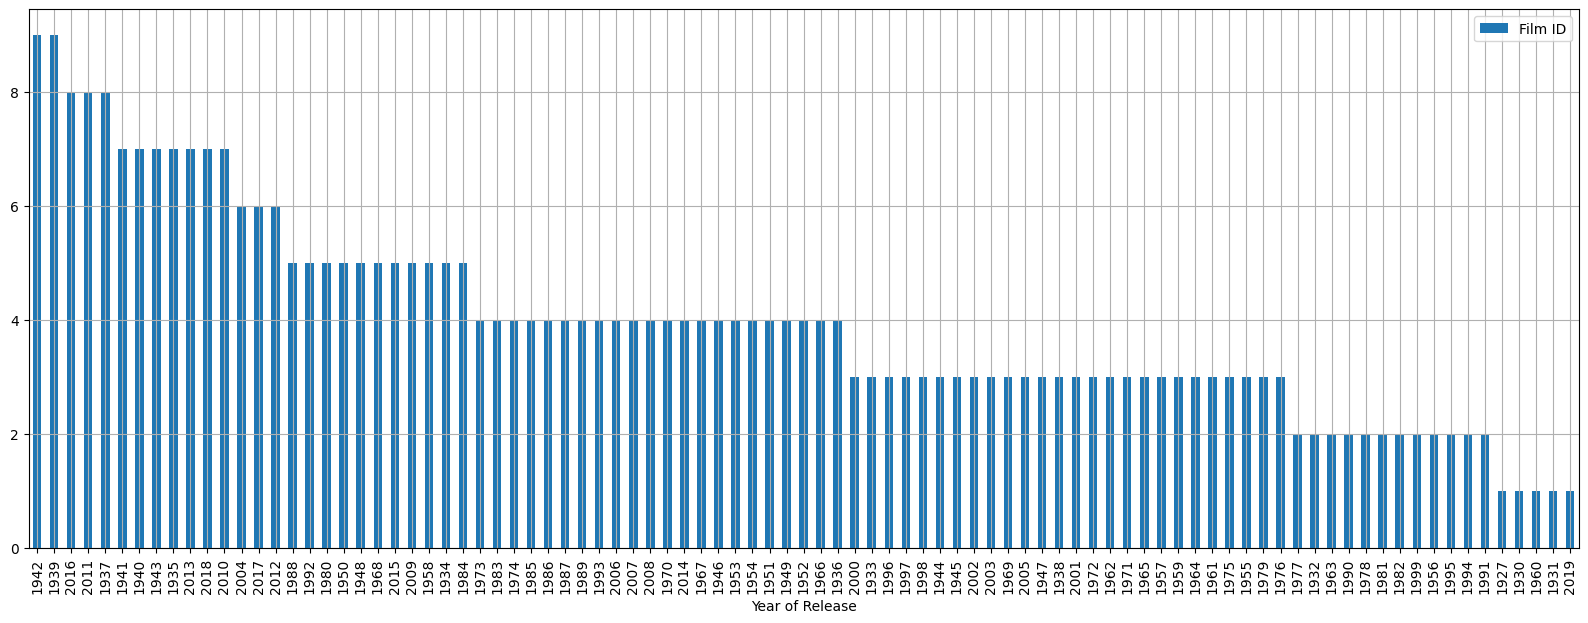

In [79]:
films_in_year.plot(grid=True, figsize=(20, 7), kind = 'bar', x='Year of Release',y='Film ID')

## Вывод
- Самая высокая средняя оценка у фильмов, вышедших в 1960, 1979, 1993  и1948
1 годах, это может быть связано с небольшим числом фильмов вышедших в данных годах.
- Самое большое число фильмов вышло в 1942, 1939, 2016, 2011 и 1937 годs.


## Факторы, влияющие на оценку фильма
На оценку могут влиять следующие факторы:

- Продолжительность фильма
- Наличие оскара
- Число оценок
- Компания производитель

Для категориальных переменных (Наличие оскара и Компания производитель) использовались прямоугольные диаграммы, а для остальных — диаграммы рассеяния. 
Матрица корреляции и графики корреляции будут использоваться для оценки силы и направления линейных связей между парами переменных.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 561
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        439 non-null    int64         
 1   Film                              439 non-null    object        
 2   Oscar Year                        439 non-null    object        
 3   Film Studio/Producer(s)           439 non-null    object        
 4   Award                             439 non-null    object        
 5   Year of Release                   439 non-null    int64         
 6   Movie Time                        439 non-null    int64         
 7   Movie Genre                       439 non-null    object        
 8   IMDB Rating                       439 non-null    float64       
 9   IMDB Votes                        439 non-null    int32         
 10  Movie Info                        439 non-null    objec

In [85]:
#data_filtered['Year of Release'] = data_filtered['Year of Release'].astype(object)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 561
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        359 non-null    int64         
 1   Film                              359 non-null    object        
 2   Oscar Year                        359 non-null    object        
 3   Film Studio/Producer(s)           359 non-null    object        
 4   Award                             359 non-null    object        
 5   Year of Release                   359 non-null    object        
 6   Movie Time                        359 non-null    int64         
 7   Movie Genre                       359 non-null    object        
 8   IMDB Rating                       359 non-null    float64       
 9   IMDB Votes                        359 non-null    int32         
 10  Movie Info                        359 non-null    objec

Text(0.5, 1.0, '1939')

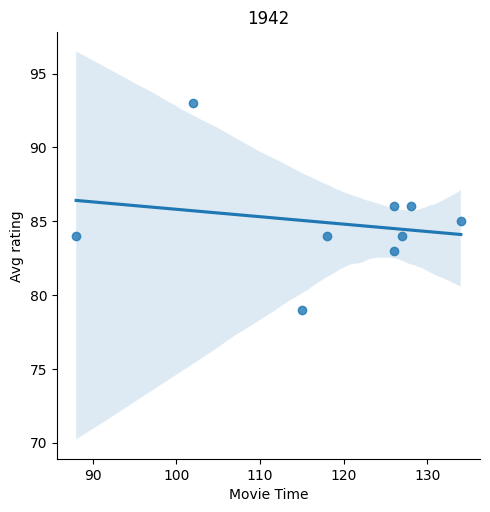

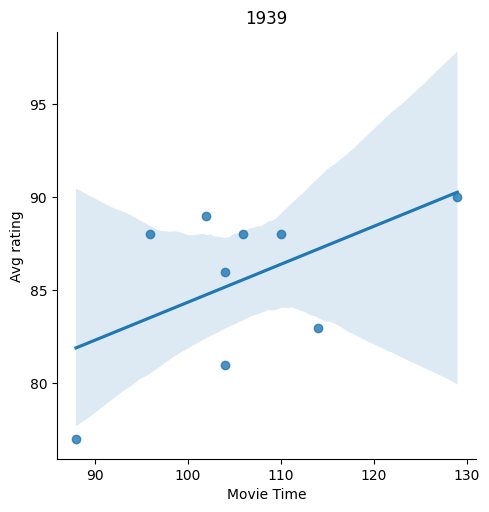

In [88]:
# Отфильтровано по 2 периодам
year_1942 = data_filtered[data_filtered['Year of Release'] == 1942]
sns.lmplot(x="Movie Time", y="Avg rating", data=year_1942)
plt.title('1942')

year_1939 = data_filtered[data_filtered['Year of Release'] == 1939]
sns.lmplot(x="Movie Time", y="Avg rating", data=year_1939)
plt.title('1939')

In [89]:
# Вычисление корелляции
time_1942 = year_1942[['Movie Time','Avg rating']]
corr_1942 = time_1942.corr()
round(corr_1942, 2)

,Movie Time,Avg rating
Movie Time,1.0,-0.2
Avg rating,-0.2,1.0


In [90]:
time_1939 = year_1939[['Movie Time','Avg rating']]
corr_1939 = time_1939.corr()
round(corr_1939, 2)

,Movie Time,Avg rating
Movie Time,1.00,0.54
Avg rating,0.54,1.00


## Выводы
- Оценка фильмов 1942 года немного зависит от их продолжительности;
- Оценка фильмов 1939 года зависит от их продолжительности: чем длиньше фильм, тем выше оценка.

Text(0.5, 1.0, '1939')

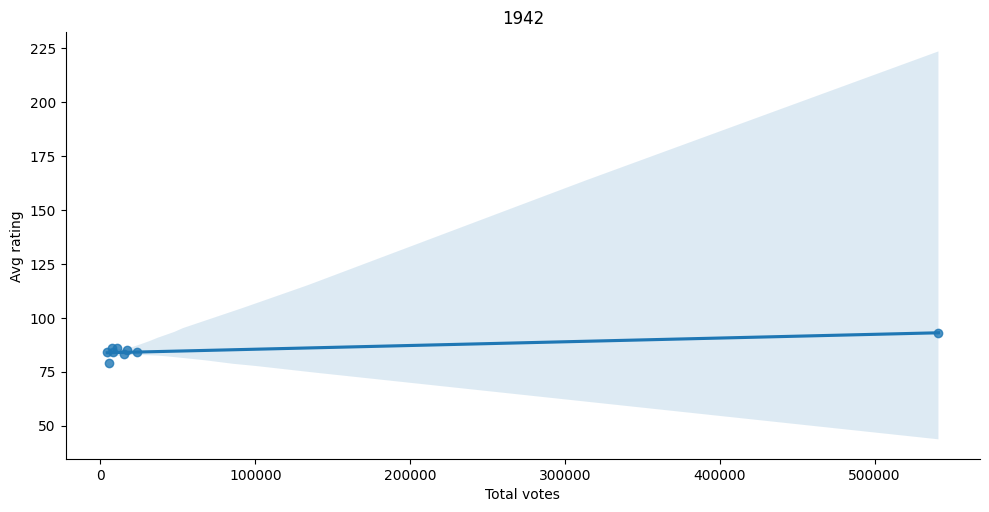

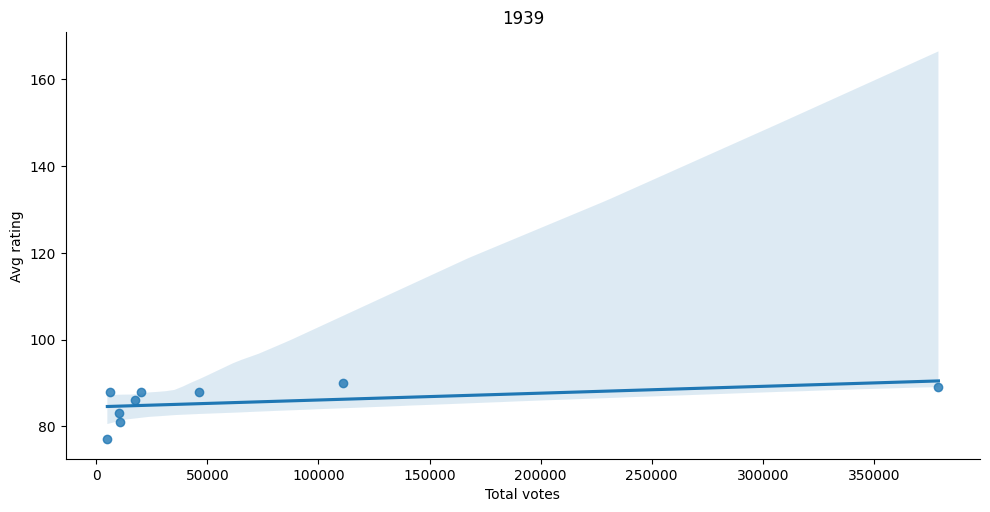

In [91]:
sns.lmplot(x="Total votes", y="Avg rating", data=year_1942, height = 5, aspect = 2)
plt.title('1942')

sns.lmplot(x="Total votes", y="Avg rating", data=year_1939, height = 5, aspect = 2)
plt.title('1939')

In [92]:
# Вычисление корелляции
votes_1942 = year_1942[['Total votes','Avg rating']]
corr_1942 = votes_1942.corr()
round(corr_1942, 2)


,Total votes,Avg rating
Total votes,1.00,0.83
Avg rating,0.83,1.00


In [93]:
votes_1939 = year_1939[['Total votes','Avg rating']]
corr_1939 = votes_1939.corr()
round(corr_1939, 2)

,Total votes,Avg rating
Total votes,1.00,0.44
Avg rating,0.44,1.00


## Выводы
- Оценки фильмов 1942 года почти не растут с увеличением количества проголосовавших;
- Оценки фильмов 1939 года немного увеличиваются с увеличением числа проголосовавших, но все ткаже незначительно.

<Axes: title={'center': 'Avg rating'}, xlabel='Award'>

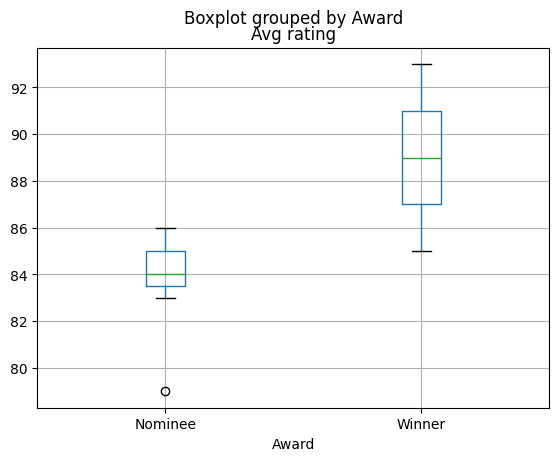

In [94]:
# Проверим категориальные признаки
year_1942.boxplot(by ='Award', column =['Avg rating'], grid = True)

<Axes: title={'center': 'Avg rating'}, xlabel='Award'>

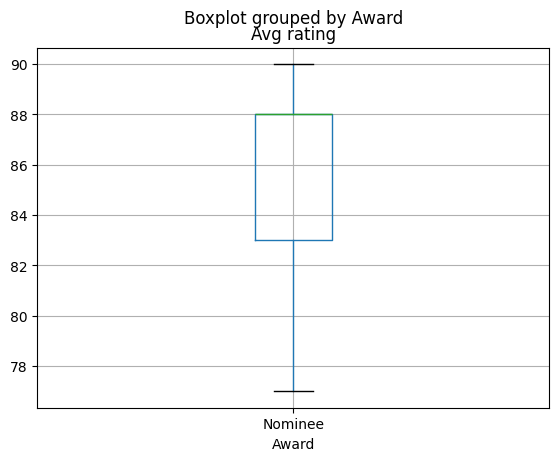

In [95]:
year_1939.boxplot(by ='Award', column =['Avg rating'], grid = True)

## Выводы
- Наличие оскара у фильмов 1942 года увеличивает его среднюю оценку приблизительно на 5 едениц;
- Так вышло 

In [96]:
year_1942.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 120 to 134
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        9 non-null      int64         
 1   Film                              9 non-null      object        
 2   Oscar Year                        9 non-null      object        
 3   Film Studio/Producer(s)           9 non-null      object        
 4   Award                             9 non-null      object        
 5   Year of Release                   9 non-null      object        
 6   Movie Time                        9 non-null      int64         
 7   Movie Genre                       9 non-null      object        
 8   IMDB Rating                       9 non-null      float64       
 9   IMDB Votes                        9 non-null      int32         
 10  Movie Info                        9 non-null      objec

<Axes: title={'center': 'Avg rating'}, xlabel='Genres'>

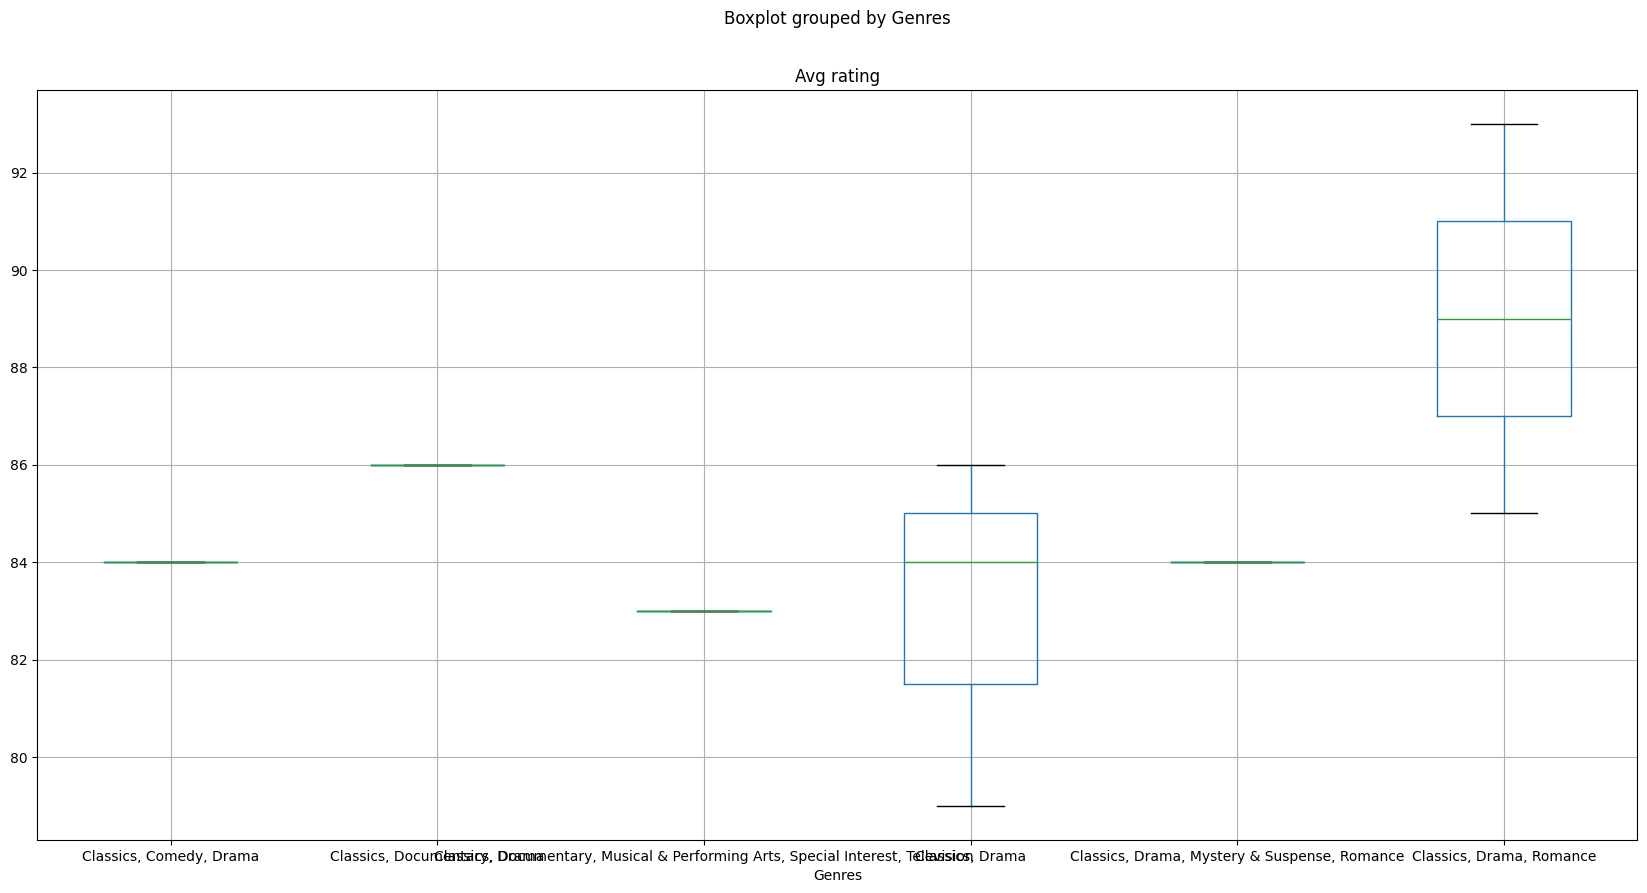

In [97]:
year_1942.boxplot(by ='Genres', column =['Avg rating'], grid = True, figsize=(20,10))

<Axes: title={'center': 'Avg rating'}, xlabel='Genres'>

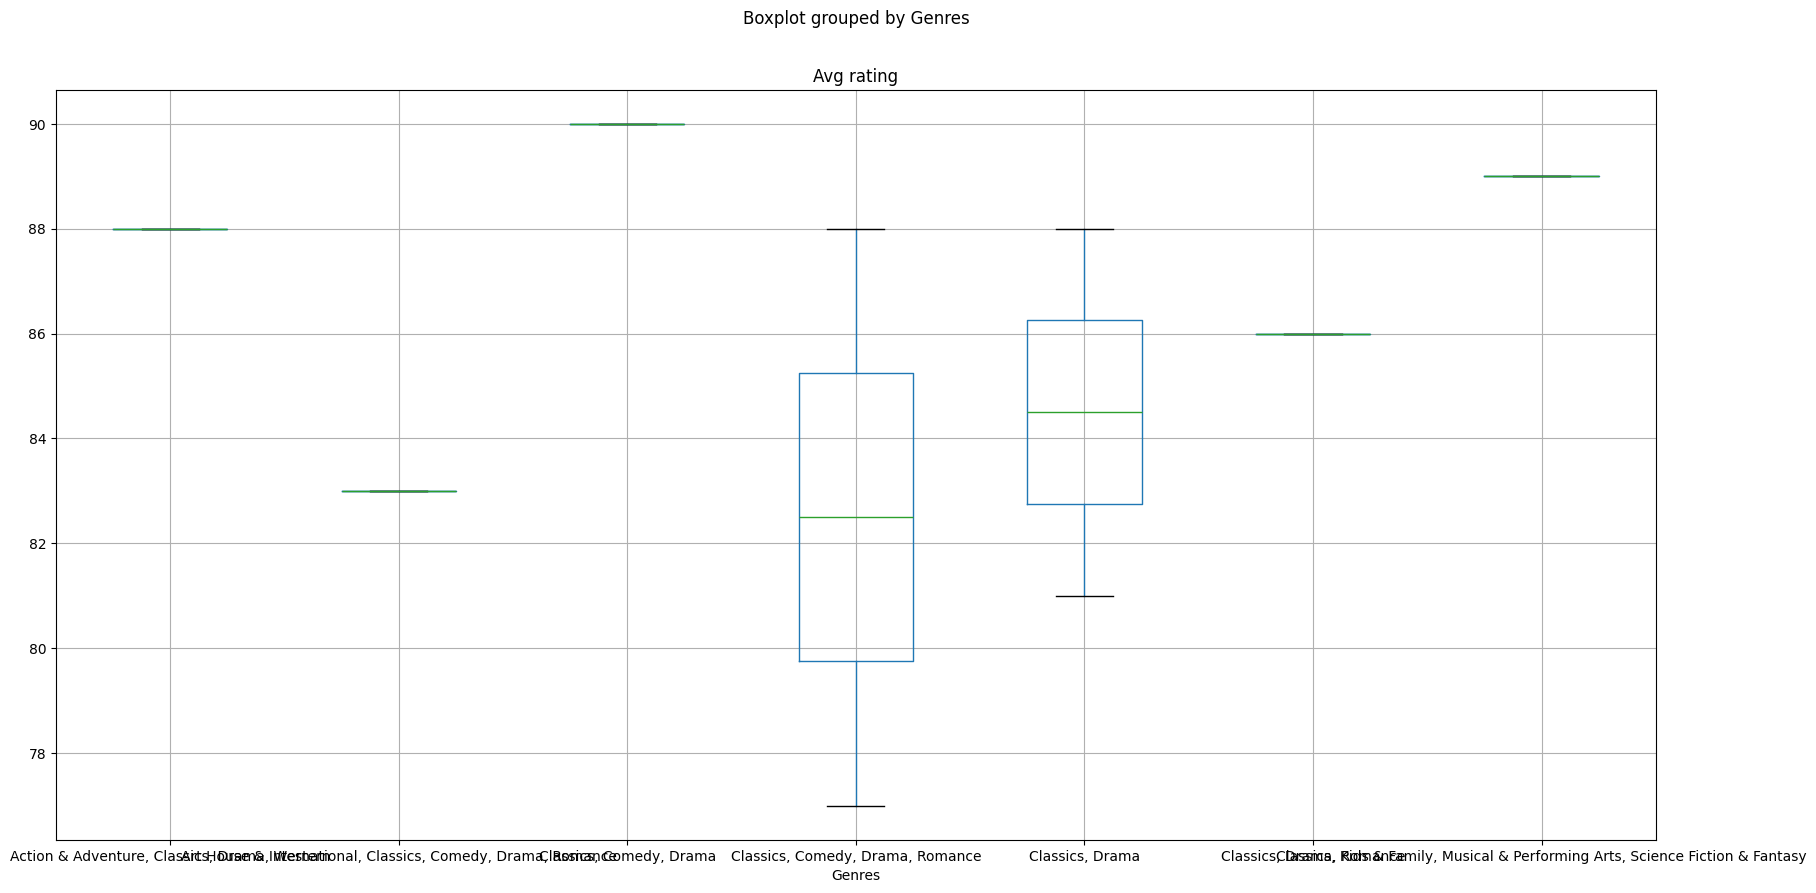

In [98]:
year_1939.boxplot(by ='Genres', column =['Avg rating'], grid = True, figsize=(20,10))

## Выводы
- Оценка фильмов 1942 года немного изменяется в зависивости от компании производителя;
- Оценка фильмов 1939 года также изменяется в зависимости от компании производителя.

## Общее Заключение

Заполнение пропусков:
- Удаление строк в которых отсутствует 19 из 30 столбоцов;
- Зполнение пропущенных значений в столбцах Movie Info, 
Critic Consensu, 
Directo, 2
Auth, e 1
Audience Stus 3 на 'unknown', так как эти д нные невозможно восттановитЗаполнение значений в столбце Streaming Release Date на моду этого столбца;

Изменение типов данных:
- Тип данных столбцов IMDB Votes, Tomatometer Rating, Tomatometer Count, Audience Rating, Audience Count, Tomatometer Top Critics Count, Tomatometer Fresh Critics Count, Tomatometer Rotten Critics Count с 'object' на 'int';
- Тип данных столбцов Original Release Date и Streaming Release Date с 'object' на 'datatime'.

Изменение значений:
- Проверка и удаление дубликатов;
- Добавление столбца со средней оценкой фильма (среднее между столбцами IMDB Rating, Content Rating и Tomatometer Rating;
- Добавление столбца с общим количеством проголовавших в оценке фильма (суммарное значение столбцов IMDB Votes, Tomatometer Count и Audience Count).

Проверка и удаление выбросов:
- Гистограммы с выбросами столбцов'Total votes' и 'Movie Time' смещены вправо, а со столбцома 'Avg rating' смещена влево
- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame.
Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столtatus

## Изучение фактора оценки фильма:
Факторы, влияющие на оценку фильма: продолжительность, число проголосвавших, , наличие оскара, компания производительок. Продолжительность фильма, число проголосвавших - используют метод диаграммы рассеяния, а остальные факторы - методом коробчатой диаграммы для исследовани.
## Итоги:
    1) Продолжительность фильма влияет на его оценку, так как коэффициент корреляции - средний.
    2) Увиличение числа проголосвавших не влияет на его изменение его оценки.
    3) Наличие оскара влияет на его итоговую оценку: если есть - то оценка выше.
    4) Компания производитель также влияет на оценку фильма.;